# ArbitraryOutlierCapper
The ArbitraryOutlierCapper() caps the maximum or minimum values of a variable
at an arbitrary value indicated by the user.

The user must provide the maximum or minimum values that will be used <br>
to cap each variable in a dictionary {feature : capping_value}

### Example

In [23]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.outliers import ArbitraryOutlierCapper

In [24]:
# Load titanic dataset from OpenML

def load_titanic(filepath='../data/titanic.csv'):
    # data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')
    data = pd.read_csv(filepath)
    data = data.replace('?', np.nan)
    data['cabin'] = data['cabin'].astype(str).str[0]
    data['pclass'] = data['pclass'].astype('O')
    data['embarked'].fillna('C', inplace=True)
    data['fare'] = data['fare'].astype('float')
    data['fare'].fillna(data['fare'].median(), inplace=True)
    data['age'] = data['age'].astype('float')
    data['age'].fillna(data['age'].median(), inplace=True)
    data.drop(['name', 'ticket'], axis=1, inplace=True)
    return data

# To plot histogram of given numerical feature
def plot_hist(data, col):
    plt.figure(figsize=(8, 5))
    plt.hist(data[col], bins=30)
    plt.title("Distribution of " + col)
    return plt.show()

In [25]:
data = load_titanic()
data.sample(5)

,passengerid,pclass,sex,age,sibsp,parch,fare,cabin,embarked,survived
212,1104,2,male,17.0,0,0,73.5000,n,S,0
248,1140,2,female,29.0,1,0,26.0000,n,S,1
181,1073,1,male,37.0,1,1,83.1583,E,C,0
119,1011,2,female,29.0,1,0,26.0000,n,S,0
42,934,3,male,41.0,0,0,7.8500,n,S,0


In [26]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(data.drop('survived', axis=1),
                                                    data['survived'],
                                                    test_size=0.3,
                                                    random_state=0)

print("train data:", X_train.shape)
print("test data:", X_test.shape)

train data: (292, 9)
test data: (126, 9)


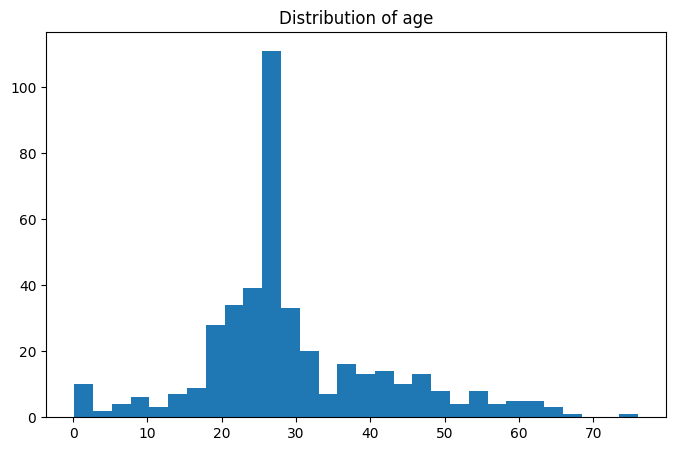

In [27]:
# Histogram of age feature before capping outliers

plot_hist(data, 'age')

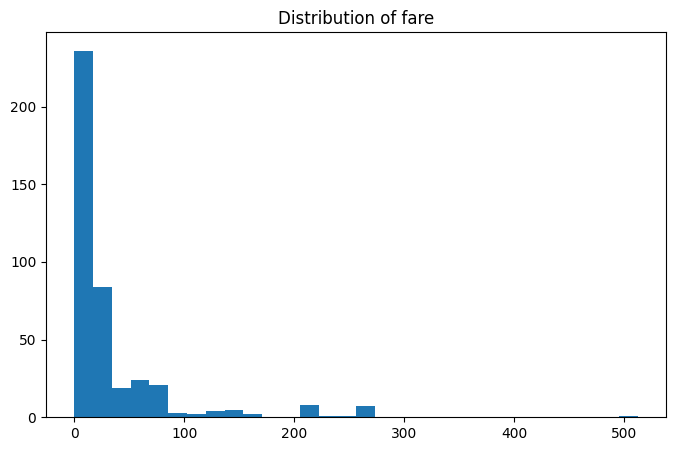

In [28]:
# Histogram of fare feature before capping outliers

plot_hist(data, 'fare')

In [29]:
# let's find out the maximum&minimum Age and maximum Fare in the titanic
print("Max age:", data.age.max())
print("Max fare:", data.fare.max())

print("Min age:", data.age.min())
print("Min fare:", data.fare.min())

Max age: 76.0
Max fare: 512.3292
Min age: 0.17
Min fare: 0.0


### Maximum capping

In [30]:
'''Parameters
----------
max_capping_dict : dictionary, default=None
    Dictionary containing the user specified capping values for the right tail of
    the distribution of each variable (maximum values).

min_capping_dict : dictionary, default=None
    Dictionary containing user specified capping values for the eft tail of the
    distribution of each variable (minimum values).

missing_values : string, default='raise'
    Indicates if missing values should be ignored or raised. If
    `missing_values='raise'` the transformer will return an error if the
    training or the datasets to transform contain missing values.
'''

# capping of age and fare features at right tail
capper = ArbitraryOutlierCapper(
    max_capping_dict={'age': 50, 'fare': 150}, min_capping_dict=None)

capper.fit(X_train)

ArbitraryOutlierCapper(max_capping_dict={'age': 50, 'fare': 150})

In [31]:
# here we can find the maximum caps allowed
print("Maximum caps:", capper.right_tail_caps_)

Maximum caps: {'age': 50, 'fare': 150}


In [32]:
# this dictionary is empty, because we selected only right tail
capper.left_tail_caps_

{}

In [33]:
# transforming train and test data
train_t = capper.transform(X_train)
test_t = capper.transform(X_test)

#check max age and max fare after capping
print("Max age after capping:", train_t.age.max())
print("Max fare after capping:", train_t.fare.max())

Max age after capping: 50.0
Max fare after capping: 150.0


### Minimum capping

In [34]:
# capping outliers at left tail
capper = ArbitraryOutlierCapper(
    max_capping_dict=None, min_capping_dict={'age': 10, 'fare': 100})

capper.fit(X_train)

ArbitraryOutlierCapper(min_capping_dict={'age': 10, 'fare': 100})

In [35]:
# this dictionary is empty, because we selected only right tail
capper.right_tail_caps_

{}

In [36]:
# here we can find the minimum caps allowed
capper.left_tail_caps_

{'age': 10, 'fare': 100}

In [37]:
# transforming train and test set
train_t = capper.transform(X_train)
test_t = capper.transform(X_test)

# After capping
print("Min age:", train_t.age.min())
print("Min fare:", train_t.fare.min())

Min age: 10.0
Min fare: 100.0


### Both ends capping

In [38]:
# capping outliers at both tails
capper = ArbitraryOutlierCapper(
    min_capping_dict={'age': 5, 'fare': 5},
    max_capping_dict={'age': 60, 'fare': 150})
capper.fit(X_train)

ArbitraryOutlierCapper(max_capping_dict={'age': 60, 'fare': 150},
                       min_capping_dict={'age': 5, 'fare': 5})

In [39]:
# here we can find the maximum caps allowed
capper.right_tail_caps_

{'age': 60, 'fare': 150}

In [40]:
# here we can find the minimum caps allowed
capper.left_tail_caps_

{'age': 5, 'fare': 5}

In [41]:
# transforming train and test data
train_t = capper.transform(X_train)
test_t = capper.transform(X_test)

# After capping outliers
print("Max age:", train_t.age.max())
print("Max fare:", train_t.fare.max())

print("Min age:", train_t.age.min())
print("Min fare:", train_t.fare.min())

Max age: 60.0
Max fare: 150.0
Min age: 5.0
Min fare: 5.0


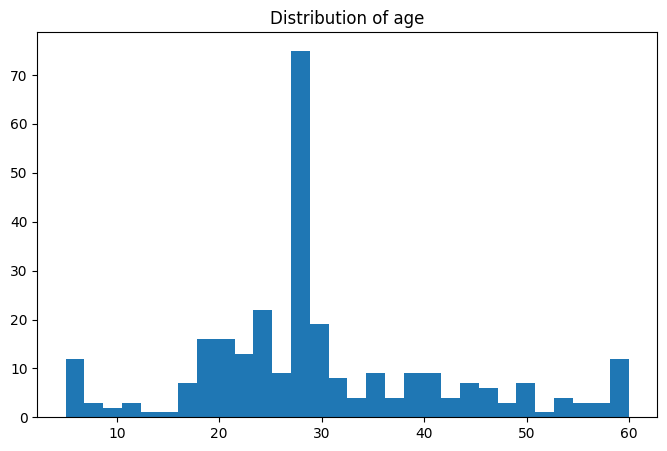

In [42]:
# Histogram of age feature after capping outliers
plot_hist(train_t, 'age')

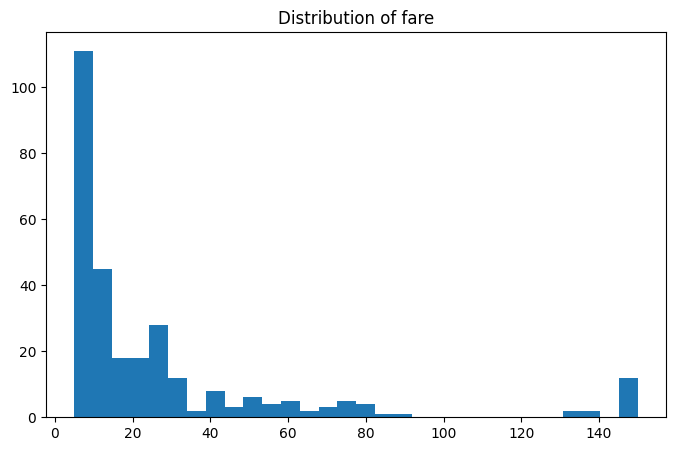

In [43]:
# Histogram of fare feature after capping outliers
plot_hist(train_t, 'fare')